#                  Covid Contact Tracing using DBSCAN Clustering Algorithm 

### Important Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

### Reading the Dataset

In [2]:
data = pd.read_json('data.json')

In [3]:
data

,id,timestamp,latitude,longitude
0,David,2020-07-04 15:35:30,13.148953,77.593651
1,David,2020-07-04 16:35:30,13.222397,77.652828
2,Frank,2020-07-04 14:35:30,13.236507,77.693792
3,Carol,2020-07-04 21:35:30,13.163716,77.562842
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273
...,...,...,...,...
95,Judy,2020-07-04 16:35:30,13.176481,77.619396
96,Bob,2020-07-04 15:35:30,13.172339,77.662080
97,Grace,2020-07-04 23:35:30,13.115079,77.697991
98,Bob,2020-07-04 19:35:30,13.180751,77.704404


### Visualizing the Dataset

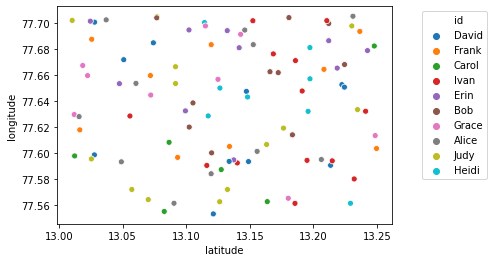

In [8]:
sns.scatterplot(data['latitude'],data['longitude'],hue=data['id'])
plt.legend(loc='upper right',bbox_to_anchor=(1.3,1))

### DBSCAN Implementation ( Density-based Spatial Clustering of Applications with Noise)

Epsilon, 

Min_samples

min_samples = 2

In [12]:
epsilon = 0.01
min_samples = 2

model = DBSCAN(eps = epsilon,min_samples = min_samples,metric='euclidean')

model.fit(data[['latitude','longitude']])

data['clusters'] = model.labels_.tolist()

In [ ]:
name='David'

In [22]:
data[data['clusters']==0]

,id,timestamp,latitude,longitude,clusters
0,David,2020-07-04 15:35:30,13.148953,77.593651,0
33,Ivan,2020-07-04 19:35:30,13.140162,77.592594,0
49,Carol,2020-07-04 19:35:30,13.127510,77.587472,0
51,Erin,2020-07-04 13:35:30,13.137346,77.594941,0
87,Ivan,2020-07-04 14:35:30,13.116175,77.590685,0
88,David,2020-07-04 12:35:30,13.133737,77.593794,0
93,Alice,2020-07-04 13:35:30,13.119563,77.584292,0


In [25]:
def infected_names(name):
    input_name_clusters = []
    for i in range(len(data)):
        if data['id'][i] == name:
            if data['clusters'][i] in input_name_clusters:
                pass
            else:
                input_name_clusters.append(data['clusters'][i])
                
    infected_ones=[]
    for cluster in input_name_clusters:
        if cluster != -1:
            ids_in_clusters = data.loc[data['clusters']==cluster,'id']
            for i in range(len(ids_in_clusters)):
                member_id = ids_in_clusters.iloc[i]
                if (member_id not in infected_ones) and (member_id != name):
                    infected_ones.append(member_id)
    return infected_ones
            

In [28]:
infected_persons = infected_names('Judy')

In [29]:
infected_persons

['Bob', 'Ivan', 'David', 'Alice', 'Frank']